# Short Assignment 2: Filtering in Fourier Domain
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
r = imageio.imread(str(input()).rstrip()).astype(np.uint8)
tin = float(input())

/home/ava/documents/classes/SCC0251_DIP/sa01/images/num_small.png
.01


In [3]:
# definition of 2D Fourier Transformation, as taught on lectures
def DFT2D(f, inverse=False):
    F = np.zeros(f.shape, dtype=np.complex64)
    n, m = f.shape[0:2]
    sign = (-1, 1)[inverse]

    x = np.arange(n).reshape(n, 1)
    y = np.arange(m).reshape(1, m)
    for u in np.arange(n):
        for v in np.arange(m):
            F[u, v] += np.sum(f[x, y] *
                              np.exp((sign*1j*2*np.pi)*(((u*x)/n)+((v*y)/m))))

    return F/np.sqrt(n*m)


def filter(f, threshold):
    F = np.zeros(f.shape, dtype=np.complex64)
    n, m = f.shape[0:2]
    countFiltered = 0

    for x in np.arange(n):
        for y in np.arange(m):
            if np.abs(f[x, y]) >= threshold:
                F[x, y] = f[x, y]
            else:
                F[x, y] = 0
                countFiltered += 1
    return countFiltered, F


def imgMean(f):
    n, m = f.shape[0:2]
    x = np.arange(n).reshape(n, 1)
    y = np.arange(m).reshape(1, m)
    mean = np.sum(f[x, y])
    return np.abs(np.real(mean)/(n*m))

In [4]:
R = DFT2D(np.asarray(r))

(-0.5, 31.5, 31.5, -0.5)

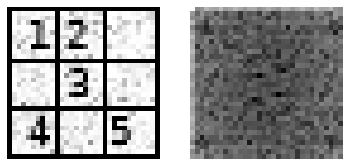

In [5]:
plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1 + np.abs(R)), cmap="gray")
plt.axis('off')

In [6]:
sndMax = np.sort(np.abs(R.flatten()))[-2]
threshold = tin * sndMax

In [7]:
countFiltered, Rfiltered = filter(R, threshold)

(-0.5, 31.5, 31.5, -0.5)

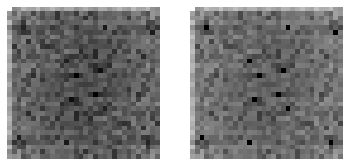

In [8]:
plt.subplot(121)
plt.imshow(np.log(1 + np.abs(R)), cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1 + np.abs(Rfiltered)), cmap="gray")
plt.axis('off')

In [9]:
rfiltered = DFT2D(np.asarray(Rfiltered), True)

(-0.5, 31.5, 31.5, -0.5)

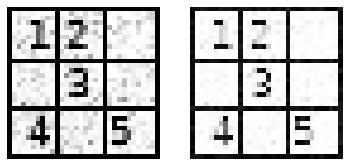

In [10]:
plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(np.log(1 + np.abs(rfiltered)), cmap="gray")
plt.axis('off')

In [15]:
print("Threshold={:.4f}".format(threshold))
print("Filtered Coefficients=", countFiltered, sep='')
print("Original Mean={:.2f}".format(imgMean(r))) # I know it's the same as R[0,0]
print("New Mean={:.2f}".format(imgMean(np.abs(rfiltered))))

Threshold=6.5500
Filtered Coefficients=12
Original Mean=168.47
New Mean=168.58
